<h2>***I submit homework that I finished in my DataMining class.***</h2>

<h2>Woosung Lee MPS Data Science and Applications </h2>
<h2> University at Buffalo</h2>
<h1>Data Mining 1 HomeWork 1-1</h1>



 Consider the Auto dataset in the ISLR package. Suppose that you are
getting this data in order to build a predictive model for mpg (miles per gallon).
Using the full dataset, investigate the data using exploratory data analysis such as
scatterplots, and other tools we have discussed. Pre-process this data and justify
your choices in your write up. Submit the cleaned dataset as an *.RData file. 


<h2>1. Before analysis the data</h2>

● We need to get text data from and convert into DataFrame.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import collections
import stemgraphic
#pip install stemgraphic

In [2]:

data = pd.read_csv('ISLR_AUTO_data.txt', sep=r'\t', header=0)
df=pd.DataFrame(data=data)
df=df.rename(columns= lambda s:s[1:-1])
df.set_index
df_ori=df

<ipython-input-2-3a3cea6f0eeb>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('ISLR_AUTO_data.txt', sep=r'\t', header=0)


● But there is no missong values.

In [3]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

What we learned in our the lab class
1. Stem and Leaf plots
2. Boxplots
3. Fitting a smooth trend curve
4. Density Plots
5. histogram
6. schetter

<h2>2. Feature Analysis</h2>

I will anysis the data with two parts 1. Numerical Values 2. Categorical values

<h3> (1) Numerical Values</h3>
<h4>A.REMOVE COLUMNS</h4>

Among the data "mpg","cylinders","displacement","horsepower","weight","acceleration","year" 
are Numerical values.
To find out each other's corelation I used </b>HEATMAP</b>

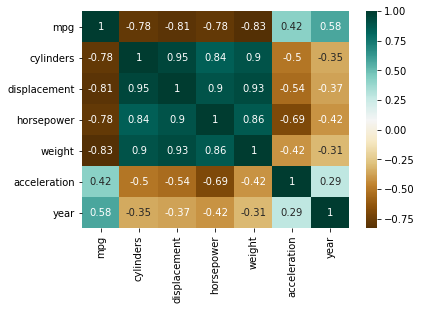

In [4]:
sns.heatmap(df[["mpg","cylinders","displacement","horsepower","weight","acceleration","year"]].corr(),cmap="BrBG",annot=True)

Let's look at the heatmap. We can find out "cylinders" "displacement", "horsepower", "weight" are Highly correlated.


cylinders - weight : 0.9

cylinders - horsepower : 0.85

cylinders - displacement : 0.95

displacement - weight : 0.93

displacement - horsepower 0.9

horsepower - weight : 0.86


I decided to remove all these factors without weight. There are three reasons that I selected Feature Weight.

1. Feature Weight has the most significant negative relation with MPG, and I supposed that the High absolute value of correlation can be a better feature to model

2. I supposed that weight can represent cylinders, displacement, and horsepower because it has high correlations with the other three features  <I>(cylinders - weight : 0.9, displacement - weight : 0.93, horsepower - weight : 0.86)</I>

3. I supposed that if features in the model have high correlation scores each other, it reduces the model accuracy. This is because correlated data has less information(because it is similar to duplicated data) while the model got larger data dimension(the curse of dimensionality problem) 


In [5]:

df.drop(["cylinders","displacement", "horsepower"],inplace=True, axis=1)

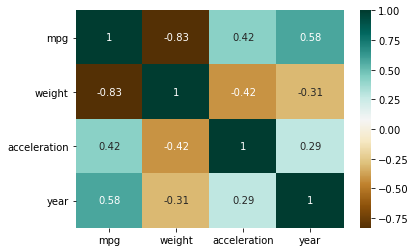

In [6]:
sns.heatmap(df[["mpg","weight","acceleration","year"]].corr(),cmap="BrBG",annot=True)

<h4>B.REMOVE ROWS</h4>

I wanted to see the relationship between MPG and the three features (Weight, Accelation, Year)
Scatter plot can show relationship between two factors intuitionally.

So I made a Function which can show the relationship and outliers.

relationship between two factors intuitionally.

So I made a Function which can show the relationship and outliers.

1. The Scatter plot of MPG-Feature shows the relationship so that I can put 1 or 2 in the poly_degree value according to their relationship. 
2. With the MPG-Feature data, the ScatterPlot Function calculates fitted data. If the difference between data and fitted data over 2 standard deviations, I listed the data in Outliers_index.(Outliers_index is used 'AND' calculator to accumulate all the Outliers_index from all the data that are applied to this function). I supposed the Data away form 2 standard deviations are not useful when leaning the model.



In [7]:
Outliers_index=[ True for i in range(392) ]
index=[True for i in range(392) ] 
def ScatterPlot(x,y,n):
    sd_cutoff = 2
    poly_degree = n
    coefficients = np.polyfit(x,y,poly_degree)
    poly_eqn = np.poly1d(coefficients)

    Y_hat = poly_eqn(x)
    delta = y - Y_hat
    sd_p = np.std(delta)

    ok = abs(delta) < sd_p * sd_cutoff
    for i in range(392):
        Outliers_index[i]=(index[i] and ok[i])
    plt.scatter(x,y,color=np.where(ok,'k','r'))

    x = np.linspace(x.min(),x.max())
    Y_hat = poly_eqn(x)
    plt.fill_between(
        x,
        Y_hat - sd_p * sd_cutoff,
        Y_hat + sd_p * sd_cutoff,
        color = '#00000020')
    plt.plot(x,Y_hat)
    plt.show()


MPG and Weight show a curved relationship so I put 2 value in the poly_degree.
We can see the plotted red data which is apart from fitted data more than 2 deviation. the red data checked in the Outliers_index

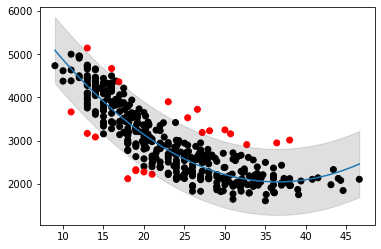

In [8]:
ScatterPlot(x=df.mpg,y=df.weight,n=2)

MPG and year show a linear relationship so I put 1 value in the poly_degree. We can see the plotted red data which is apart from fitted data more than 2 deviation. the red data also checked in the Outliers_index

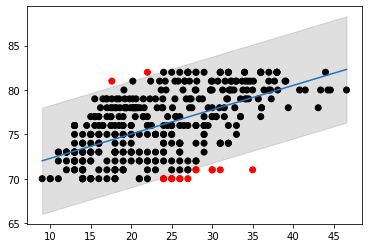

In [9]:
ScatterPlot(x=df.mpg,y=df.year,n=1)

MPG and acceleration show a linear relationship so I put 1 value in the poly_degree. We can see the plotted red data which is apart from fitted data more than 2 deviation. the red data also checked in the Outliers_index

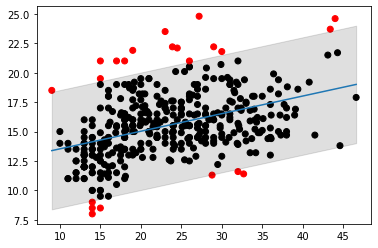

In [10]:
ScatterPlot(df.mpg, df.acceleration,1)

In [11]:
sum(Outliers_index)

370



<h3> (2)Categorical values</h3>

Among the data "origin" and "name" are Categorical values

<h4>A.REMOVE ROWS</h4>
I made a boxplot with shows the relation between origin and MPG.
The Feature Origin has 3 values(1,2,3), it's own values have a relation with MPG.
to find out Outliers by each Origin values(1,2,3) in the boxplot, I decided to use the "1.5 IQR Method" 
This is because 'origin' is categorical values and it seems to have a rough trend with MPG compared with other factors.
So I decided to delete only the too much odd data values(too much far from the trend: apart from about 2.7 Standard deviation. 9 data is selecte to deleted among 393)

C:\Users\WS_LEE\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


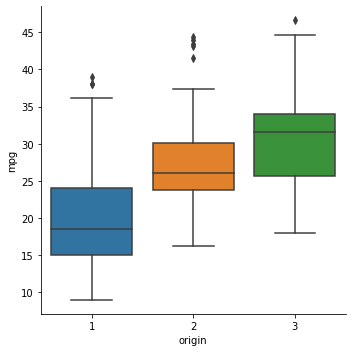

In [12]:
g = sns.factorplot(y="mpg",x="origin",data=df ,kind="box")

In [13]:

def MPG_ORI_OL(Orinum):
    df_MPG_ORI=df[df['origin']==Orinum]
    Q1 = df_MPG_ORI['mpg'].quantile(0.25)
    Q3 = df_MPG_ORI['mpg'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (df_MPG_ORI['mpg'] >= Q1 - 1.5 * IQR) & (df_MPG_ORI['mpg'] <= Q3 + 1.5 *IQR)
    return filter

In [14]:
MPG_ORI_OL(1)
MPG_ORI_OL(2)
MPG_ORI_OL(3)
MPG_ORI_Outlyer=pd.concat([MPG_ORI_OL(1),MPG_ORI_OL(2),MPG_ORI_OL(3)])

In [15]:
sum(MPG_ORI_Outlyer)

383

<h4>B.Feature Engineering</h4>

The dataset "Name" is the only data which is not compsed to numbers.

In the Name, There are some informations about
1. the brand name
2. the specific car neme
3. other informations that indicate car's trait.

<h5>Feature Engineering Step.</h5>

   
    1. collect all the words in the name columns
     - I supposed that in the name of a car there is some attribute of the car.
    2. Find what words are the commonly used word
     - a commonly used word can represent some attribute
    3. Rank all the words and select one commonly used word by each car
     - the selected word represent the car
    4. With the selected word, sort by commonly used name and determine how many words would be the Category of Name the column
     - I will use the Stem and Leaf plot to decide the criterium of the number of the Category Name
    5. arrange the category number in the Name column
    6. With the bar plot, check the relation with MPG and Name

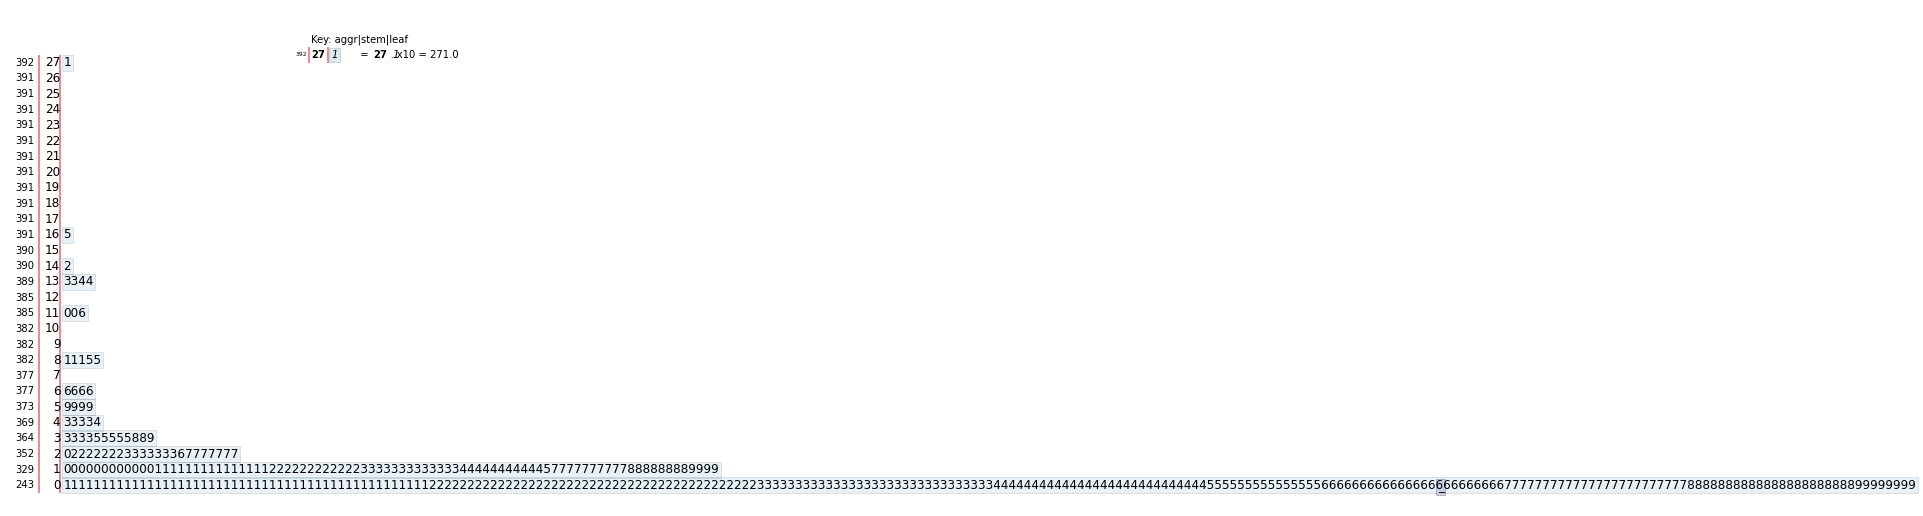

In [16]:
Names = []
Names_S=([i[1:-1].split(" ") for i in df.name])

for i in range(0,len(Names_S)):
    for j in range(0, len(Names_S[i])):
        Names.append(Names_S[i][j])

counter=collections.Counter(Names)
counter=counter.most_common()    
selectedNamelist=[]
selectedNamelist_num=[]

for i in range(0,len(Names_S)):
    max=0
    for j in range(0, len(Names_S[i])):
        for k in range(0,len(counter)):
            if(Names_S[i][j]==counter[k][0]):
                if(counter[k][1] > max):
                    max=counter[k][1]
                    Maxlist=counter[k][0]
                    Maxlist_num=k
        #print(Maxlist)
    selectedNamelist.append(Maxlist)
    selectedNamelist_num.append(Maxlist_num)
    #print(Maxlist,"is",Maxlist_num)
    #print("##################")
                
selectedNamelist_num=np.asarray(selectedNamelist_num)+1
y= pd.Series(selectedNamelist_num)
fig, ax = stemgraphic.stem_graphic(y)
plt.show()    
len(selectedNamelist_num)
selectedNamelist_num_mod=[]

for i in selectedNamelist_num:
    if(i>30):
        i=0
        
    selectedNamelist_num_mod.append(i)

In [17]:

df.drop(['name'],inplace=True, axis=1)
df['mod_name'] = selectedNamelist_num_mod
#df['name'] = selectedNamelist_num


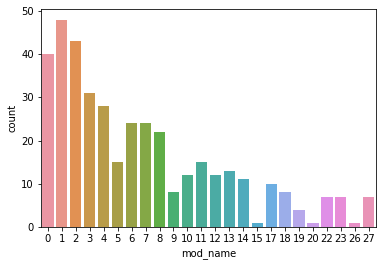

In [19]:
sns.countplot(x=df.mod_name)

C:\Users\WS_LEE\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


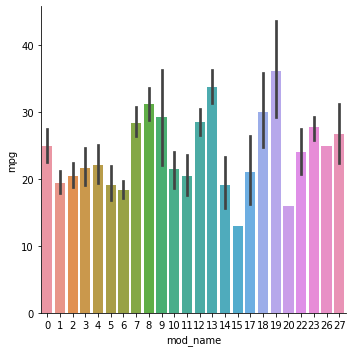

In [20]:
sns.factorplot(x="mod_name",y="mpg",data=df,kind="bar")

<h2>3. Remove Outlyers</h2>

With two OUTLYERS table, remove columns (with *)

In [21]:
df

,mpg,weight,acceleration,year,origin,mod_name
0,18.0,3504,12.0,70,1,2
1,15.0,3693,11.5,70,1,10
2,18.0,3436,11.0,70,1,3
3,16.0,3433,12.0,70,1,6
4,17.0,3449,10.5,70,1,1
...,...,...,...,...,...,...
387,27.0,2790,15.6,82,1,1
388,44.0,2130,24.6,82,2,0
389,32.0,2295,11.6,82,1,4
390,28.0,2625,18.6,82,1,1


In [22]:
MPG_ORI_Outlyer=MPG_ORI_Outlyer.tolist()
MPG_ORI_Outlyer=np.array(MPG_ORI_Outlyer)
Outliers_index=np.array(Outliers_index)
ind =[]
for i in range(392):
    ind.append(MPG_ORI_Outlyer[i]*Outliers_index[i])
    
for i in range(len(ind)):
    if ind[i]==True:
        ind[i]=False
    else:
        ind[i]=True

In [14]:
A=[True,True,False,True,False,False]
B=[len(A)]


In [17]:
for i in range(len(A)):
    B[i] = not A[i]

B=not A
print(B)

TypeError: 'bool' object does not support item assignment

In [23]:
sum(ind)

31

In [24]:
df=df.drop(df.index[ind])

In [25]:
df

,mpg,weight,acceleration,year,origin,mod_name
0,18.0,3504,12.0,70,1,2
1,15.0,3693,11.5,70,1,10
2,18.0,3436,11.0,70,1,3
3,16.0,3433,12.0,70,1,6
4,17.0,3449,10.5,70,1,1
...,...,...,...,...,...,...
385,36.0,2370,13.0,82,1,4
386,27.0,2950,17.3,82,1,2
387,27.0,2790,15.6,82,1,1
390,28.0,2625,18.6,82,1,1
